# MNIST 손글씨 - CNN 4
- 2 Conv2D layers with padding
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network(512) layer
- 1 Dropout(0.5) layer
- 1 Output layer



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# 3차원 데이터를 4차원으로 (데이터는 2차원을 3차원으로)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### 모델 정의, 설정, 학습, 평가

In [14]:
# Flatten(2차원을 1차원으로)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),                              # n차원을 1차원으로 변환
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [16]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [17]:
# 모델 최적화를 위한 설정
modelpath  = 'model/best_mnist.cnn_4.h5'
checkpoint = ModelCheckpoint(
    modelpath, verbose=1, save_best_only=True
)
early_stopping = EarlyStopping(patience=10)

In [18]:
# 모델 학습
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, verbose=0,
                    callbacks=[checkpoint, early_stopping]
                    )


Epoch 00001: val_loss improved from inf to 0.05985, saving model to model/best_mnist.cnn_4.h5

Epoch 00002: val_loss improved from 0.05985 to 0.05301, saving model to model/best_mnist.cnn_4.h5

Epoch 00003: val_loss improved from 0.05301 to 0.04022, saving model to model/best_mnist.cnn_4.h5

Epoch 00004: val_loss improved from 0.04022 to 0.03709, saving model to model/best_mnist.cnn_4.h5

Epoch 00005: val_loss improved from 0.03709 to 0.03680, saving model to model/best_mnist.cnn_4.h5

Epoch 00006: val_loss improved from 0.03680 to 0.03449, saving model to model/best_mnist.cnn_4.h5

Epoch 00007: val_loss improved from 0.03449 to 0.03406, saving model to model/best_mnist.cnn_4.h5

Epoch 00008: val_loss did not improve from 0.03406

Epoch 00009: val_loss improved from 0.03406 to 0.03254, saving model to model/best_mnist.cnn_4.h5

Epoch 00010: val_loss did not improve from 0.03254

Epoch 00011: val_loss did not improve from 0.03254

Epoch 00012: val_loss did not improve from 0.03254

Epo

In [19]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9908


[0.03044920042157173, 0.9908000230789185]

### 훈련과정 시각화

In [20]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

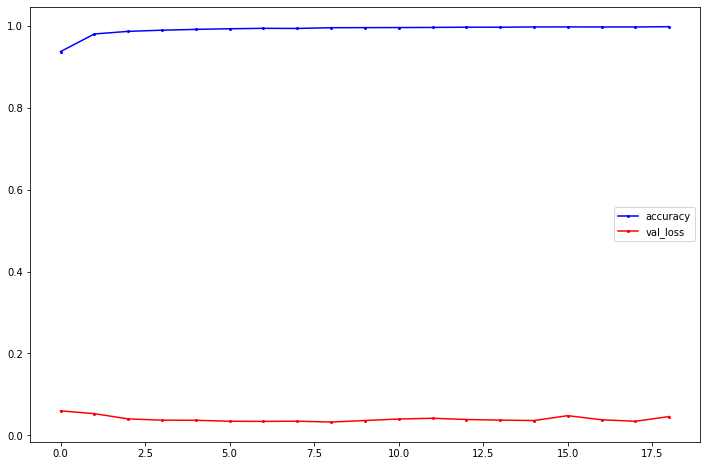

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()